### Project - Thera Bank Personal Loan Campaign


This case is about a bank (Thera Bank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9%  success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget


#### Domain 
Banking

### 1. Import the necessary packages

In [1]:
# Imporing the necessary Libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np # linear algebra
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

####  Reading the dataset into dataframe 

In [4]:
# Load the dataset

DF = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [5]:
DF.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


####  Checking check datatype, statistical summary,shape,null values or incorrect imputation

In [6]:
print(DF.dtypes)
print()
print(DF.describe().T)
print()
print(DF.shape)
print()
print(DF.isnull().sum())

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

                      count      mean      std      min       25%       50%  \
ID                 5,000.00  2,500.50 1,443.52     1.00  1,250.75  2,500.50   
Age                5,000.00     45.34    11.46    23.00     35.00     45.00   
Experience         5,000.00     20.10    11.47    -3.00     10.00     20.00   
Income             5,000.00     73.77    46.03     8.00     39.00     64.00   
ZIP Code           5,000.00 93,152.50 2,121.85 9,307.00 91,911.00 93,437.00   
Family             5,000.00      2.40     1.15     1.00      1.00      2.00   
CCAvg       

### 2. EDA:  Studying  the  data  distribution  in  each  attribute  and  target  variable

In [7]:
# Analysing the data distribution of each column

DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [8]:
# Data Distribution Summary


# Age: almost have normal distibution.. mean and median are almost same
# Experience: almost have normal distibution.. mean and median are almost same
# Income: mean is slightly higher than median.. Q3 and Max difference is very large compared to Q1 and Min difference...
# income data is skewed toward right side and might have upper side outliers
# CCAvg: mean is slightly higher than median.. Q3 and Max difference is very large compared to Q1 and Min difference...
# CCAvg data is skewed toward right side and might have upper side outliers
# Mortgage: many customer don't have mortgage so mortgage date to be analysis seperate..data distribution to be analysi
# sepeartely for customer having mortgage
# Personal Loan: this is target variable.. only 9.65 customer have personal loan.. 
# dataset don't have balance classification so we should be careful as modeling might get baised toward 
# customer not having personal laon 

# Following columns belongs to Categorical Data: Family, Education, Securities Account, CD Account, Onlone, CreditCard


In [9]:
# Checking the unique values in each column

print(DF.nunique())

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [10]:
# Checking Number of people who has Zero Mortgage

DF.groupby('Mortgage').count().head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
Mortgage,,,,,,,,,,,,,
0,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462
75,8,8,8,8,8,8,8,8,8,8,8,8,8
76,12,12,12,12,12,12,12,12,12,12,12,12,12
77,4,4,4,4,4,4,4,4,4,4,4,4,4
78,15,15,15,15,15,15,15,15,15,15,15,15,15


In [11]:
## 3462 people has Zero Mortgage 

In [12]:
# Checking Number of people with zero credit card spending per month

#DF[DF['CreditCard']==0]
DF.groupby('CreditCard').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
CreditCard,,,,,,,,,,,,,
0,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
1,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470


In [13]:
## 3530 people with Zero credit card spending per month

In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
DF['Family'] = DF['Family'].astype('category')
DF['Education'] = DF['Education'].astype('category')
DF['Securities Account'] = DF['Securities Account'].astype('category')
DF['CD Account'] = DF['CD Account'].astype('category')
DF['Online'] = DF['Online'].astype('category')
DF['CreditCard'] = DF['CreditCard'].astype('category')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.6 KB


In [16]:
# Value counts of all categorical columns

#'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'

for i in list(DF.columns[DF.dtypes=='category']):   # checking value counts of all object type columns
    print(DF[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [17]:
# There are total 1472 with Single Person in Family Column
# There are total 1296 with two people in Family column
# There are total 1222 with 4 people in Family column
# There are total 1010 with 3 people in Family column

In [18]:
# There are total 2096 customers who are undergraduate
# There are total 1501 customers who has graduation
# There are total 1403 customers who ahas Advanced/Professional degree

In [19]:
# 522 Customers has Securities Account with the bank
# 4478 Customers do not have Securities Account with the bank

In [20]:
# 302 Customers has Certificate of Deposite Account with the bank
# 4698 Customers do not have CD Account

In [21]:
# 2984 customers have online account
# 2016 customer do not have online account

In [22]:
# 1470 customers use a credit card issued by UniversalBank

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F401B1A288>,
      dtype=object)

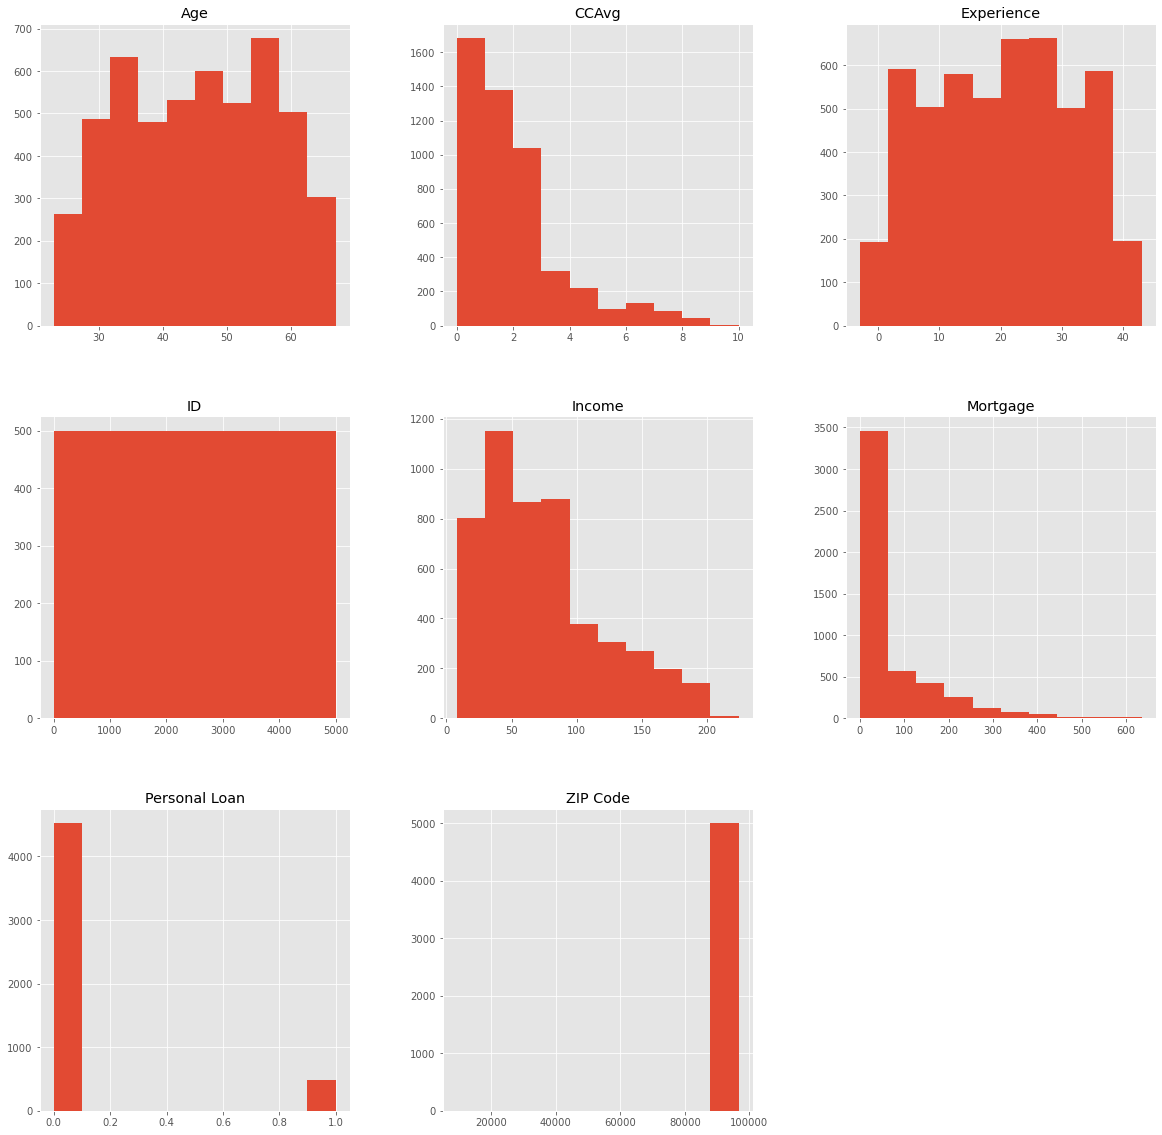

In [23]:
# performing univariant analysis by generating histogram of all dimensions
DF.hist(figsize = [20,20])

ID               AxesSubplot(0.125,0.125;0.133621x0.755)
Age           AxesSubplot(0.285345,0.125;0.133621x0.755)
Experience     AxesSubplot(0.44569,0.125;0.133621x0.755)
ZIP Code      AxesSubplot(0.606034,0.125;0.133621x0.755)
CCAvg         AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

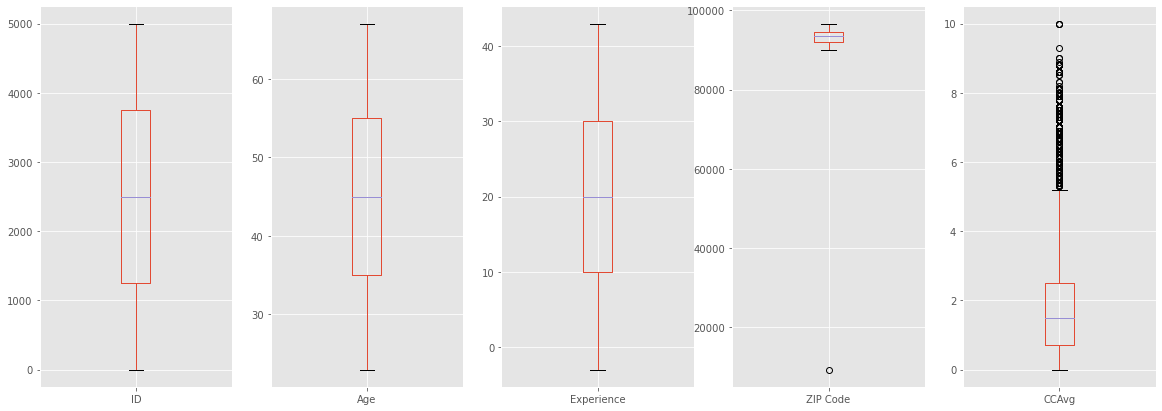

In [24]:
# plotting box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
DF.iloc[:,[0,1,2,4,6]].plot(kind="box",subplots = True, ax=ax)

In [25]:
def category_distribution(colname):
    col_data = DF[colname].value_counts().to_frame()
    col_data.reset_index(inplace=True)
    col_data.columns = [col_data.columns[1], 'count']
    col_data['pernt'] = col_data['count'] / sum(col_data['count'])
    print("\n % Distribution for: ",colname)
    print(col_data)


In [26]:
# analysising Percentage % distribution of categorical columns


category_distribution("Family")
category_distribution("Education")
category_distribution("Personal Loan")
category_distribution("Securities Account")
category_distribution("CD Account")
category_distribution("Online")
category_distribution("CreditCard")


 % Distribution for:  Family
  Family  count  pernt
0      1   1472   0.29
1      2   1296   0.26
2      4   1222   0.24
3      3   1010   0.20

 % Distribution for:  Education
  Education  count  pernt
0         1   2096   0.42
1         3   1501   0.30
2         2   1403   0.28

 % Distribution for:  Personal Loan
   Personal Loan  count  pernt
0              0   4520   0.90
1              1    480   0.10

 % Distribution for:  Securities Account
  Securities Account  count  pernt
0                  0   4478   0.90
1                  1    522   0.10

 % Distribution for:  CD Account
  CD Account  count  pernt
0          0   4698   0.94
1          1    302   0.06

 % Distribution for:  Online
  Online  count  pernt
0      1   2984   0.60
1      0   2016   0.40

 % Distribution for:  CreditCard
  CreditCard  count  pernt
0          0   3530   0.71
1          1   1470   0.29


In [27]:
def do_Personal_Loan_analysis(colname):
    data = pd.crosstab(DF[colname],DF["Personal Loan"])
    print("\nAnalyse %s category for Personal Loan" %(colname))
    print(data)

In [28]:
# analysing distribution of categorical feature w.r.t Personal Loan

do_Personal_Loan_analysis("Family")
do_Personal_Loan_analysis("Education")
do_Personal_Loan_analysis("Securities Account")
do_Personal_Loan_analysis("CD Account")
do_Personal_Loan_analysis("Online")
do_Personal_Loan_analysis("CreditCard")


Analyse Family category for Personal Loan
Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134

Analyse Education category for Personal Loan
Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205

Analyse Securities Account category for Personal Loan
Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60

Analyse CD Account category for Personal Loan
Personal Loan     0    1
CD Account              
0              4358  340
1               162  140

Analyse Online category for Personal Loan
Personal Loan     0    1
Online                  
0              1827  189
1              2693  291

Analyse CreditCard category for Personal Loan
Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143


In [29]:
# Family: customer with 3 or 4 child have higher percentage of personal loan 
# Education: customer having undergraduate having lower percentage of personal loan


# Securities Account : Customer who do not have Securities Account have higher perntage of personal loan.
# CD Account :  Customer who do not have CD Accont have higher percentage of personal loan
# Online   : Customer who has online Account have higher percentage of personal loan
# CreditCard: Customer who do not Universal Credit Card have higher percentage of personal loan.

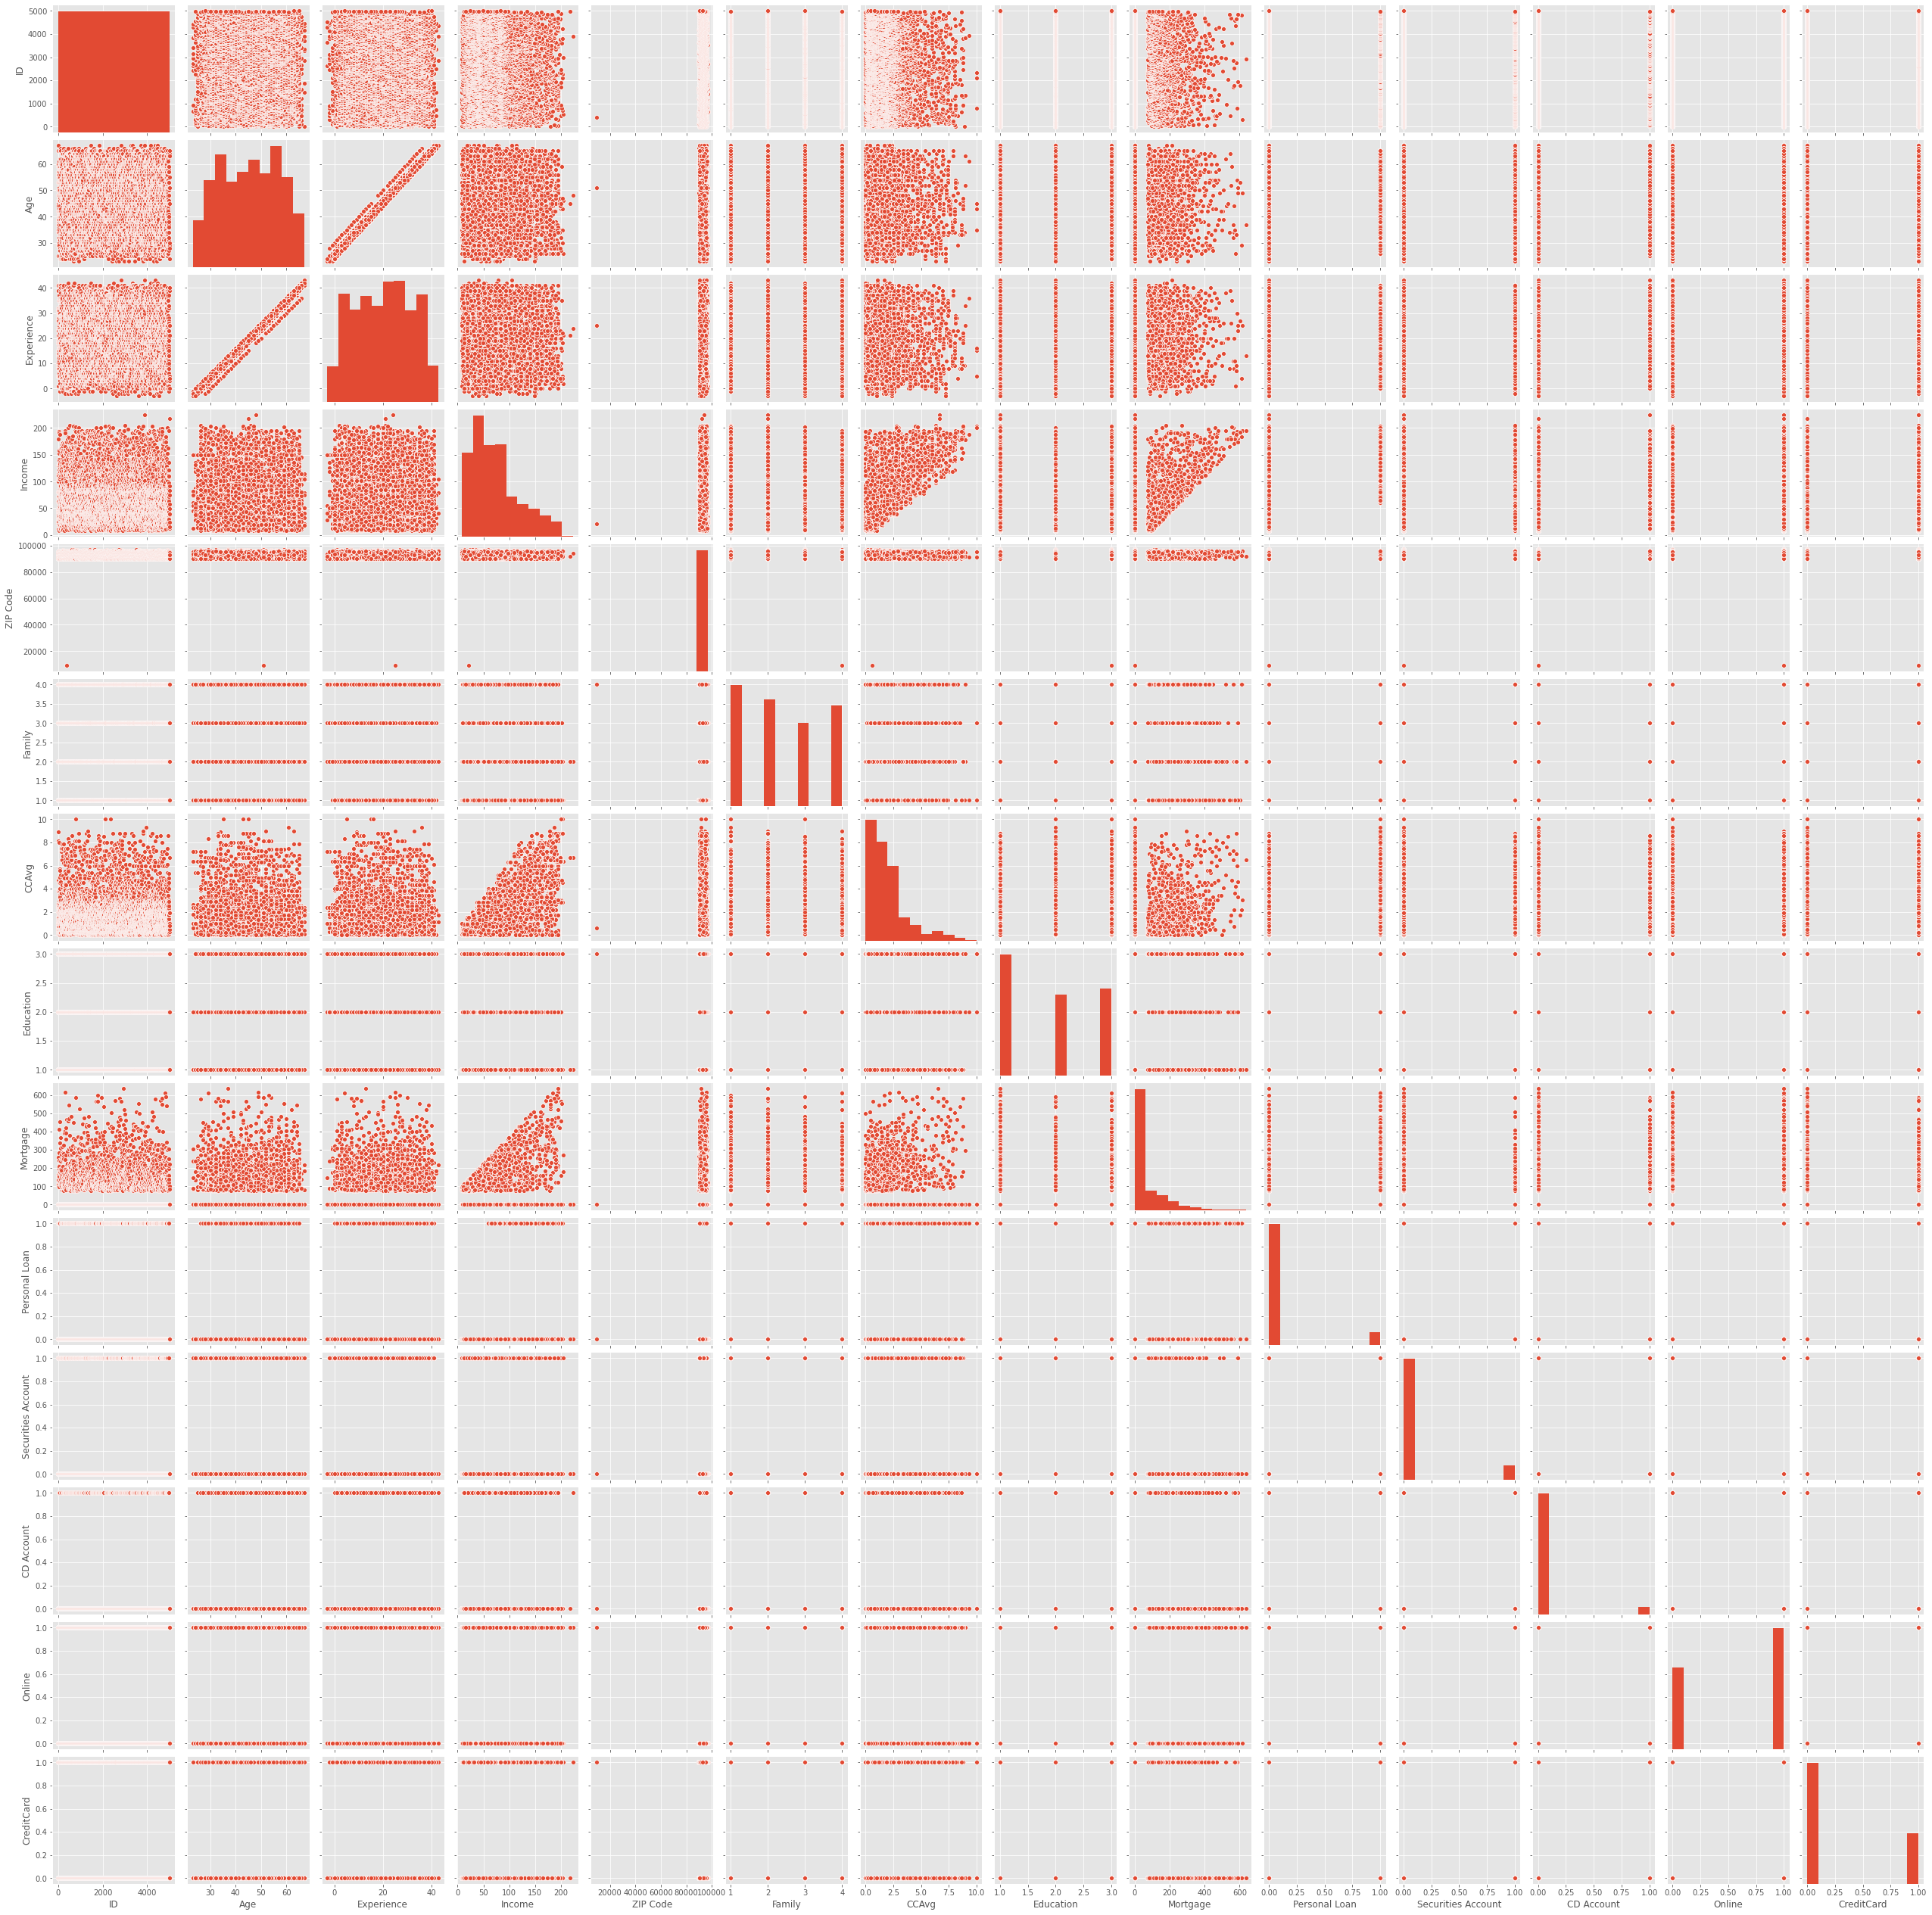

In [30]:
# Bivariate Analysis
%matplotlib inline
sns.pairplot(DF)

In [31]:
# The distributions are more separable on some dimensions such as Income and CcAvg
#Age is normally distributed and also mean and median are almost same
#Experience is also normally distributed with mean and median almost same.here we observe some negative experience which might be due to data entry error.
#Income is a right skewed distribution ,so mean is greater than median
#CC_Avg is right skewed distribution
#Mortgage is also right skewed and most of the customers have mortgage less than 400k$
#family and education are ordinal variables.so equally distributed
#Personal Loan,Securities Account,CD Account,Online and Credit Card are binary categorical variables
#Income and CCAvg is moderately correlated. 
#Age and Experience is highly correlated

In [33]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=8):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

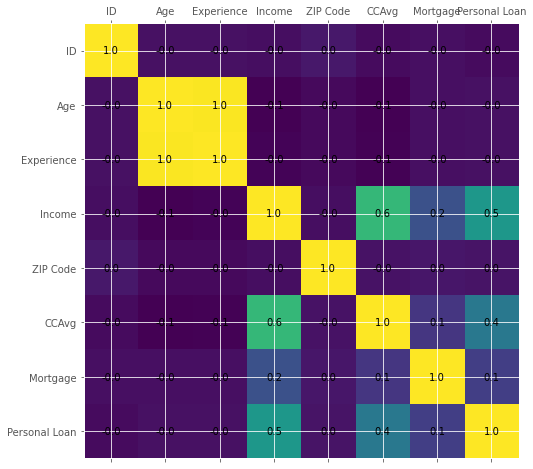

In [34]:
plot_corr(DF)

In [35]:
# Analysing independent variable correlation with target variable
corr_list = DF.corrwith(DF["Personal Loan"])
corr_list

ID              -0.02
Age             -0.01
Experience      -0.01
Income           0.50
ZIP Code         0.00
CCAvg            0.37
Mortgage         0.14
Personal Loan    1.00
dtype: float64

In [36]:
# Income, CCAvg, CD Account might be good predictor for target variable(Personal Loan)..

In [37]:
# Overall Outcome for Data Analysis as follow:
#=============================================

# Analysis based on describe function and pair plot are as follow:

# AGE: almost have normal distibution.. mean and median are almost same
# EXPERIENCE: almost have normal distibution.. mean and median are almost same
# INCOME: mean is slightly higher than median.. Q3 and Max difference is very large compared to Q1 and Min difference...
# income data is skewed toward right side and might have upper side outliers
# CCAVG: mean is slightly higher than median.. Q3 and Max difference is very large compared to Q1 and Min difference...
# CCAVG data is skewed toward right side and might have upper side outliers
# MORTGAGE: many customer don't have mortgage so mortgage date to be analysis seperate..data distribution to be analysi
# sepeartely for customer having mortgage
# PERSONAL LOAN: this is target variable.. only 9.6% customer have personal loan.. 
# dataset don't have balance classification so we should be careful as modeling might get baised toward 
# customer not having personal loan

# Boxplot analysis: Income, CCAvg and Mortgage have outliers on upper side

# Following columns belongs to Categorical Data: Family, Education, Securities Account, CD Account, Onlone, CreditCard
# Categorocal variables are further analyse through cross-tab. Also their distribution is observed w.r.t Personal loan
# Family: customer with 3 or 4 child have higher percentage of personal loan 
# Education: customer having undergraduate education are having lower percentage of personal loan

# After Analysis through pair plot and corelation calculation it is observed that 
# Income, CCAvg, CD Account might be good predictor for target variable..

In [38]:
# only 9.6% customer have personal loan.. 
# dataset don't have balance classification so we should be careful as modeling might get baised toward 
# customer not having personal loan

In [39]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same

DF[DF['Experience'] < 0]['Experience'].count()

52

In [40]:
#clean the negative variable
dfExp = DF.loc[DF['Experience'] >0]
negExp = DF.Experience < 0
column_name = 'Experience'
mylist = DF.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [41]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [42]:
for id in mylist:
    age = DF.loc[np.where(DF['ID']==id)]["Age"].tolist()[0]
    education = DF.loc[np.where(DF['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    DF.loc[DF.loc[np.where(DF['ID']==id)].index, 'Experience'] = exp

In [43]:
# checking if there are records with negative experience
DF[DF['Experience'] < 0]['Experience'].count()

0

In [44]:
# After the detailed analysis we can drop Age, ID, Experience and ZIP Code columns


DF.drop(['ZIP Code','Age','ID','Experience'], axis=1, inplace = True)

DF.head()

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,4,1.60,1,0,0,1,0,0,0
1,34,3,1.50,1,0,0,1,0,0,0
2,11,1,1.00,1,0,0,0,0,0,0
3,100,1,2.70,2,0,0,0,0,0,0
4,45,4,1.00,2,0,0,0,0,0,1





### 3. Spliting the data into training and test set in the ratio of 70:30 respectively

In [45]:
## Define X and Y variables
X = DF.drop('Personal Loan', axis=1)
Y = DF[['Personal Loan']]

In [46]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [47]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

lets check split of the data


In [48]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(DF.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(DF.index)) * 100))

70.00% data is in training set
30.00% data is in test set






###  4. Using Logistic Regression model to predict the numberof a customers buying personal loans. Printing all the metrics related for evaluating the model performance

In [49]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_predict = logreg.predict(X_test)

In [51]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9594285714285714

Testing accuracy 0.9533333333333334

Confusion Matrix


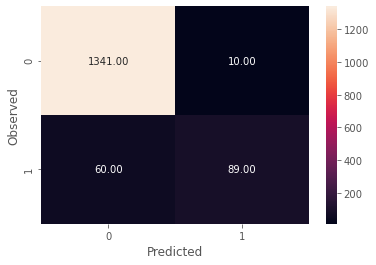

None

Recall: 0.5973154362416108

Precision: 0.898989898989899

F1 Score: 0.7177419354838711

Roc Auc Score: 0.7949567558706203


In [52]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

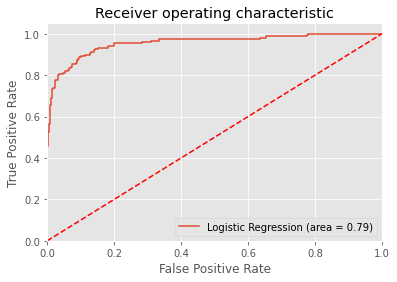

In [53]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
# Here Training Accuracy and Testing are Accuracy are almost same as 0.959 and 0.953 respectively.
# Hence it will be better model to predict Number of Customers Buying Personal Loans.

In [55]:
## # Recall = TP/TP+FN
#Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class
#- yes. 
# The question recall answers is: Of all the Customers, how many number of customers buying Personal Loan ? 
# We have got recall of 0.597 which is good for this model as it’s above 0.5.

In [56]:
# Precision = TP/TP+FP

#Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
#The question that this metric answer is of all Customers, how many number of customers buying Personal Loan? 
#High precision relates to the low false positive rate. We have got 0.89 precision which is pretty good.

In [57]:
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# F1 score - F1 Score is the weighted average of Precision and Recall. 
#Therefore, this score takes both false positives and false negatives into account. 
#ntuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy,
#especially  an uneven class distribution. 
#Acuracy works best if false positives and false negatives have similar cost. 
#f the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
#n our case, F1 score is 0.717.

In [58]:
# AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. 
# ROC is a probability curve and AUC represents degree or measure of separability. 
# It tells how much model is capable of distinguishing between classes. 
# Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
# By analogy, Higher the AUC, better the model is at distinguishing between Customers who are buying personal loan or not.
# Here we have got Roc Auc Score: 0.79 which is pretty good.

### 5.  Checking on how can the model perform better

In [59]:
# Checking Parameters of logistic regression

logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.


In [60]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.961, 0.962, 0.96, 0.905, 0.905]

[0.952, 0.954, 0.951, 0.901, 0.901]


In [61]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.962, 0.905]

[0.955, 0.901]


In [62]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# choose any one

class_weightdict or ‘balanced’, default=None Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.


In [63]:
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9157142857142857

Testing accuracy 0.9126666666666666


In [64]:
## Training Testing accuracy alomost same and we can say model is not overfit/underfit

Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. 

In [65]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='saga',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.328, 0.385, 0.389, 0.391, 0.391, 0.392]

[0.339, 0.403, 0.407, 0.409, 0.409, 0.41]


Trainig accuracy 0.9151428571428571

Testing accuracy 0.9133333333333333

Confusion Matrix


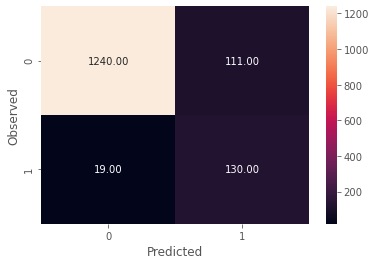

None

Recall: 0.87248322147651

Precision: 0.5394190871369294

F1 Score: 0.6666666666666666

Roc Auc Score: 0.895160929761201


In [66]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.75)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [67]:
# After Optimising Parameters
# We have got Recall value : 0.87
# Precision : 0.53
# f1 Score : 0.66
# Roc Auc score : 0.89 , we can say that this model after optmisation 89 percent accurate to predict number of customers
# Buying Personal Loan

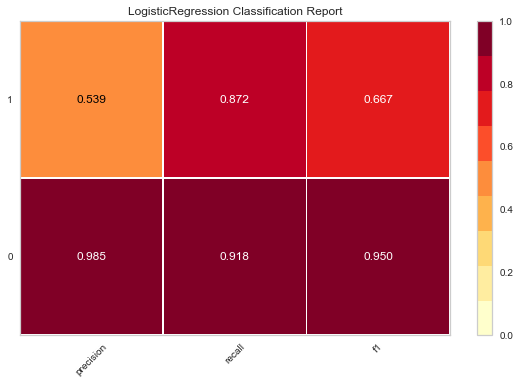

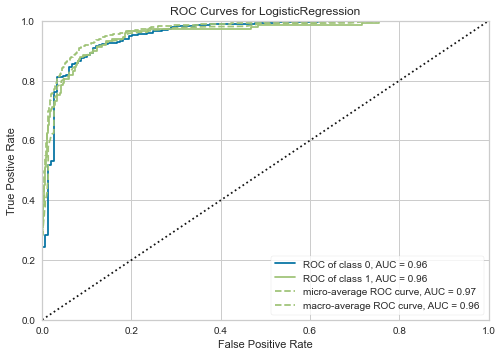

In [68]:
# Additional
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### 6. Business Insights

Confusion matrix means

True Positive (observed=1,predicted=1):

Predicted that home loan will be granted and the customer was eligibile for loan

False Positive (observed=0,predicted=1):

Predicted that home loan will be granted and the customer was not eligibile for loan

True Negative (observed=0,predicted=0):

Predicted that home loan will not be granted and the customer was not eligibile for loan

False Negative (observed=1,predicted=0):

Predicted that home loan will not be granted and the customer was eligibile for loan

Here the bank wants to give loan to the people who are eligible for the home loan i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence Precision is the important metric.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers.
